## MNIST1 with Ai2z

Data from https://github.com/JuliaReach/NeuralVerification.jl/blob/master/test/runtime1.jl, line 

https://github.com/JuliaReach/NeuralVerification.jl/blob/master/test/runtime1.jl#L71

In [36]:
using NeuralVerification, LazySets, Plots
using NeuralVerification: forward_layer, forward_partition

In [7]:
function mnist1_problem()
    mnist1_file = "/home/mforets/.julia/dev/NeuralVerification/examples/networks/mnist1.nnet"
    mnist1 = read_nnet(mnist1_file, last_layer_activation = Id())
    # entry 23 in MNIST datset
    input_center = [0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,254,136,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,230,253,248,99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,118,253,253,225,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,61,253,253,253,74,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,206,253,253,186,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,211,253,253,239,69,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,254,253,253,133,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,142,255,253,186,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,149,229,254,207,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,54,229,253,254,105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,152,254,254,213,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,112,251,253,253,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29,212,253,250,149,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,214,253,253,137,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,75,253,253,253,59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,93,253,253,189,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,224,253,253,84,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43,235,253,126,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,99,248,253,119,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,225,235,49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    output_center = [-1311.1257826380004,4633.767704436501,-654.0718535670002,-1325.349417307,1175.2361184373997,-1897.8607293569007,-470.3405972940001,830.8337987382,-377.7467076115001,572.3674015264198]

    in_epsilon = 1.0 # 0-255
    out_epsilon = 10.0 #logit domain

    input_low = input_center .- in_epsilon
    input_high = input_center .+ in_epsilon

    output_low = output_center .- out_epsilon
    output_high = output_center .+ out_epsilon

    inputSet = Hyperrectangle(low=input_low, high=input_high)
    outputSet = Hyperrectangle(low=output_low, high=output_high)

    problem_mnist = Problem(mnist1, inputSet, outputSet)
end

mnist1_problem (generic function with 1 method)

In [30]:
prob = mnist1_problem();
X0 = prob.input;
Y = prob.output;
net = prob.network;

In [45]:
@time X1 = forward_layer(Ai2z(), net.layers[1], X0)
@time X2 = forward_layer(Ai2z(), net.layers[2], X1);
length(X2)

  0.004876 seconds (38 allocations: 5.453 MiB)
  0.000125 seconds (8 allocations: 123.578 KiB)


1

In [46]:
out = first(X2);

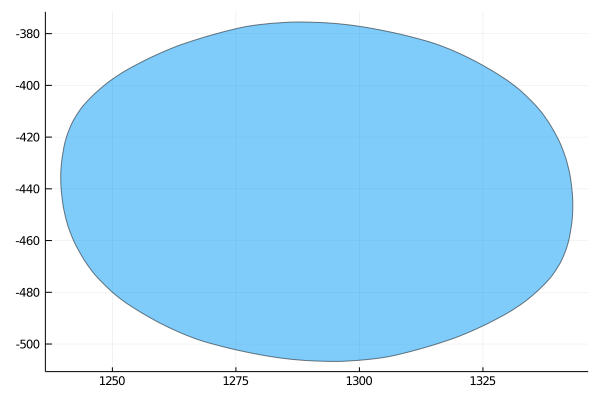

In [73]:
plot(Projection(out, [9, 10]))

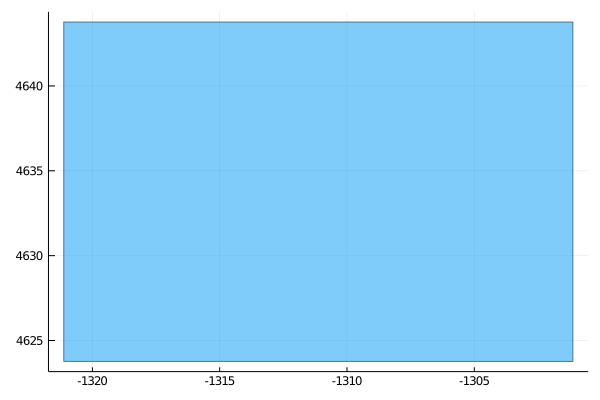

In [53]:
plot(Projection(Y, [1, 2]))

In sum, the output does not contain the `outputSet`.

----

## MNIST_SMALL with Ai2z

Data from https://github.com/sisl/NeuralVerification.jl/blob/master/test/runtime.jl


Line number

https://github.com/sisl/NeuralVerification.jl/blob/master/test/runtime.jl#L21

In [58]:
function mnist_small()
    mnist_small = read_nnet("/home/mforets/.julia/dev/NeuralVerification/examples/networks/mnist_small.nnet")

    # entry 23 in MNIST datset
    input_center = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,254,136,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,230,253,248,99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,118,253,253,225,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,61,253,253,253,74,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,206,253,253,186,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,211,253,253,239,69,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,254,253,253,133,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,142,255,253,186,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,149,229,254,207,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,54,229,253,254,105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,152,254,254,213,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,112,251,253,253,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29,212,253,250,149,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,214,253,253,137,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,75,253,253,253,59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,93,253,253,189,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,224,253,253,84,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43,235,253,126,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,99,248,253,119,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,225,235,49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    output_center = [-1311.1257826380004,4633.767704436501,-654.0718535670002,-1325.349417307,1175.2361184373997,-1897.8607293569007,-470.3405972940001,830.8337987382,-377.7467076115001,572.3674015264198]

    in_epsilon = 1 #0-255
    out_epsilon = 10 #logit domain

    input_low = input_center .- in_epsilon
    input_high = input_center .+ in_epsilon

    output_low = output_center .- out_epsilon
    output_high = output_center .+ out_epsilon

    inputSet = Hyperrectangle(low=input_low, high=input_high)
    outputSet = Hyperrectangle(low=output_low, high=output_high)

    problem_hyperrect_small = Problem(mnist_small, inputSet, outputSet)
end

mnist_small (generic function with 1 method)

In [59]:
prob = mnist_small();
X0 = prob.input;
Y = prob.output;
net = prob.network;
net.layers

In [61]:
@time X1 = forward_layer(Ai2z(), net.layers[1], X0)
length(X1)

1-element Array{NeuralVerification.Layer,1}:
 NeuralVerification.Layer{Id,Float64}([0.00967898 0.0158844 … 0.00187861 0.00280567; -0.00881655 0.00386361 … -0.00767655 -0.00259271; … ; 0.0112104 0.00166185 … 0.00131557 -0.00481982; 0.0125582 -0.00665823 … -0.00723359 0.0167881], [-0.400092, 0.375775, 0.136846, -0.239122, -0.00442209, 1.41899, -0.130078, 0.650365, -1.54558, -0.262676], Id())

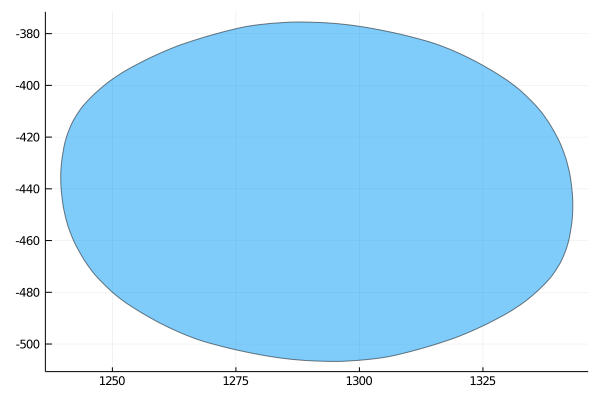

In [71]:
out = first(X1)
plot(Projection(out, [9, 10])) 

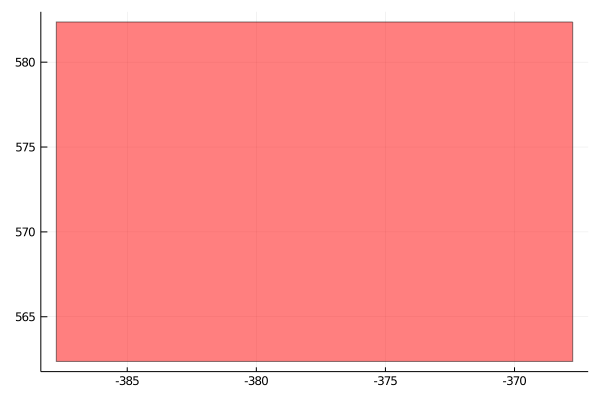

In [72]:
plot(Projection(Y, [9, 10]), color=:red)

----

TODO:

- Probar con Ai2z las otras "mnist" del archivo https://github.com/sisl/NeuralVerification.jl/blob/master/test/runtime.jl#L21

- Probar que da ReluVal a ver si es comparable con lo nuestro

## MNIST1 - out1

In [75]:
function mnist1_out1()
    mnist1 = read_nnet("/home/mforets/.julia/dev/NeuralVerification/examples/networks/mnist1_out1.nnet")

    # entry 23 in MNIST datset
    input_center = [0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,254,136,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,230,253,248,99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,118,253,253,225,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,61,253,253,253,74,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,206,253,253,186,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,211,253,253,239,69,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,254,253,253,133,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,142,255,253,186,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,149,229,254,207,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,54,229,253,254,105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,152,254,254,213,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,112,251,253,253,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29,212,253,250,149,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,214,253,253,137,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,75,253,253,253,59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,93,253,253,189,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,224,253,253,84,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43,235,253,126,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,99,248,253,119,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,225,235,49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    output_center = [-1311.1257826380004,4633.767704436501,-654.0718535670002,-1325.349417307,1175.2361184373997,-1897.8607293569007,-470.3405972940001,830.8337987382,-377.7467076115001,572.3674015264198]

    in_epsilon = 1.0 #0-255
    out_epsilon = 10.0 #logit domain

    input_low = input_center .- in_epsilon
    input_high = input_center .+ in_epsilon

    output_low = output_center .- out_epsilon
    output_high = output_center .+ out_epsilon

    inputSet = Hyperrectangle(low=input_low, high=input_high)

    A = Matrix(undef, 2, 1)
    A = [1.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0 ,0.0]'
    b = [0.0]
    outputSet = HPolytope(A, b)

    out_hyper = Hyperrectangle(low=[-5000.0], high=[-200.0])

    problem_mnist1 = Problem(mnist1, inputSet, out_hyper)
end

mnist1_out1 (generic function with 1 method)

In [76]:
mnist1_out1()

Problem{Hyperrectangle{Float64,Array{Float64,1},Array{Float64,1}},Hyperrectangle{Float64,Array{Float64,1},Array{Float64,1}}}(Network(NeuralVerification.Layer[NeuralVerification.Layer{ReLU,Float64}([-0.0145822 -0.10073 … 0.0317891 -0.121057; 0.0927983 0.0378668 … -0.170367 0.0468094; … ; 0.106251 -0.0527935 … -0.152655 -0.159538; -0.0353035 0.107237 … -0.15136 -0.11534], [0.250202, -0.0460057, 0.197282, 0.206724, 0.19505, 0.123348, 0.195402, 0.195682, 0.270503, 0.0789479  …  0.00734778, 0.195026, 0.139418, 0.188492, 0.36361, -0.0787834, 0.209898, 0.276816, 0.103367, 0.239872], ReLU()), NeuralVerification.Layer{Id,Float64}([-0.048196 0.0694253 … -0.147897 -0.0522713], [0.0894416], Id())]), Hyperrectangle{Float64,Array{Float64,1},Array{Float64,1}}([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]), Hyperrectangle{Float64,Array{Float

In [77]:
prob = mnist_small();
X0 = prob.input;
Y = prob.output;
net = prob.network;
net.layers

2-element Array{NeuralVerification.Layer,1}:
 NeuralVerification.Layer{ReLU,Float64}([-0.0145822 -0.10073 … 0.0317891 -0.121057; 0.0927983 0.0378668 … -0.170367 0.0468094; … ; 0.106251 -0.0527935 … -0.152655 -0.159538; -0.0353035 0.107237 … -0.15136 -0.11534], [0.250202, -0.0460057, 0.197282, 0.206724, 0.19505, 0.123348, 0.195402, 0.195682, 0.270503, 0.0789479  …  0.00734778, 0.195026, 0.139418, 0.188492, 0.36361, -0.0787834, 0.209898, 0.276816, 0.103367, 0.239872], ReLU())
 NeuralVerification.Layer{Id,Float64}([-0.048196 0.0694253 … -0.147897 -0.0522713], [0.0894416], Id())

In [78]:
@time X1 = forward_layer(Ai2z(), net.layers[1], X0)
@time X2 = forward_layer(Ai2z(), net.layers[2], X1);
length(X2)

  0.024996 seconds (38 allocations: 5.453 MiB, 90.42% gc time)
  0.000050 seconds (6 allocations: 12.922 KiB)


1

In [80]:
X2

1-element Array{Zonotope{Float64,Array{Float64,1},Array{Float64,2}},1}:
 Zonotope{Float64,Array{Float64,1},Array{Float64,2}}([-444.2274570202227], [-0.04031061323906853 0.00823230084990974 … -3.2066373192273425 0.18599848396024718])

In [86]:
out = first(X2)
out ⊆ Y

true